## Linear Regression using Gradient descent

#### Exercise 1a: Linear regression with one independent variable using gradient descent

This notebook implements the exercise lessons in the Stanford Online Machine Learning course taught by Andrew Ng on coursera.org. I hope to implement these on Python since the courses are taught using Octave/Matlab

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Step 1: Read the data file into the Numpy ndarray object.
This data shows the profits for a food truck vendor in different cities of different populations.

In [35]:
data = np.loadtxt('ex1data1.txt', delimiter = ',')
X = data[:,0]
y = data[:,1]
m = len(data) #number of training examples

Step 2: Plot a scatter diagram for the dataset. There are 97 training examples in the dataset.

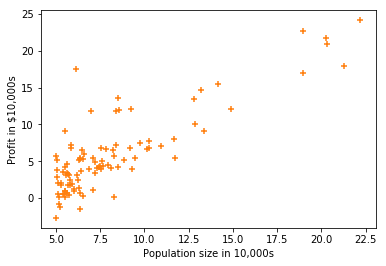

In [36]:
plt.scatter(X, y, marker='+')
plt.xlabel('Population size in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

We would create a linear regression model which would be used to predict profits for different cities based on their population using gradient descent algorithm.

In [40]:
#Add a column one of ones corresponding to the intercept terms.
X = np.ones((m,2))
X[:,1] = data[:,0]

y = y.reshape(m,1)

#initialize the parameter values to 0
Theta = np.zeros((2,1))
Theta

array([[ 0.],
       [ 0.]])

#### Cost Function

The gradient descent algorithm tries to minimize the cost corresponding to selecting a particular set of parameters iteratively until a minimum value is obtained.

In [5]:
def computeCost(X,y,Theta):
    '''
    Parameters: 
    X - dependent variable
    y - Independent variable
    Theta - Parameter vector
    
    Return Value: returns the cost corresponding to a particular set of chosen
    parameters defined in the parameter vector.
    
    '''
    m = len(y)
    cost =(1/(2*m)) * np.sum(np.power((np.matmul(X,Theta) - y), 2))
      
    return cost


In [6]:
def gradDescentStep(X, y, Theta, alpha):
    '''
    Parameters:
    X - The independent variable
    y - The dependent variable which the algorithm is going to predict
    Theta - The parameter vector corresponding to starting parameters
    alpha - The learning rate
    
    Returns: 
    newTheta - The new value of the parameter vector after this iteration
    '''
    diff = sum((np.matmul(X, Theta) - y) * X)
    newTheta = Theta - (alpha/m) * diff.reshape(Theta.shape)
    
    return newTheta


Lets compute gradient descent for 1000 iterations and plot the output using a learning rate of 0.01

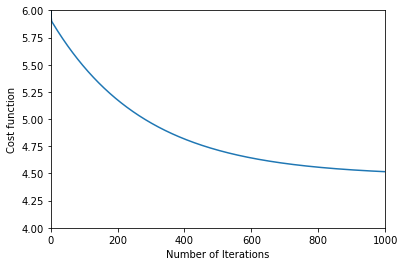

In [21]:
alpha = 0.01
result = []
Theta = np.zeros((2,1))
for i in range(1,1000):
    Theta = gradDescentStep(X, y, Theta, alpha)
    cost = computeCost(X,y,Theta)
    result.append(cost)
costlist = np.array(result)    
plt.plot(np.arange(1,1000),costlist)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost function')
plt.axis([0,1000, 4, 6])
plt.show()


Let's implement a recursive version of the gradient descent algorithm and then compute the optimal value of the learning rate used.

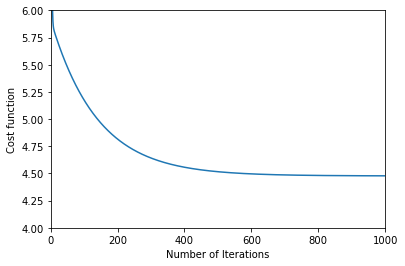

In [54]:
alpha = 0.02
Theta = np.zeros((2,1))
result = []
for i in range(1,1000):
    Theta = gradDescentStep(X, y, Theta, alpha)
    cost = computeCost(X,y,Theta)
    result.append(cost)
costlist = np.array(result)    
plt.plot(np.arange(1,1000),costlist)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost function')
plt.axis([0,1000, 4, 6])
plt.show()

The algorithm seems to converge earlier with a learning rate of 0.02. The learnt parameter values can then be used for predicting further profits for different cities of different populations.

In [27]:
Theta

array([[-3.7880308 ],
       [ 1.18220898]])

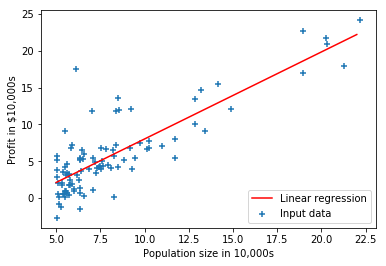

In [62]:
x_reg = np.ones((100, 2))
x_reg[:,1] = np.linspace(5, 22, 100)
y_reg = np.matmul(x_reg, Theta)

plt.scatter(X[:,1], y, marker='+', label= 'Input data')
plt.plot(x_reg[:,1], y_reg, 'r', label = 'Linear regression')
plt.xlabel('Population size in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='lower right')
plt.show()

#### Exercise 1b: Linear regression in more than one dependent variable or features

For more than one dependent variable, the number parameters would be n + 1 where n is the number of dependent variables or features. That is the parameter vector Theta would be n + 1 dimensional.

The data set used for this exercise was obtained from prices of house based on their respective sizes and their number of bedrooms.

In [113]:
data = np.loadtxt('ex1data2.txt', delimiter = ',')
X = data[:,0:2]
y = data[:, 2]

It is necessary that all of the features are put in a similar scale to ensure that the impact of all the features would impact the final algorithm. This is called feature scaling. A good form of feature scaling is normalization i.e making the features follow a normal distribution by using its mean and standard deviation. Notice that the first feature is in 1,000s and the second is unit scales.

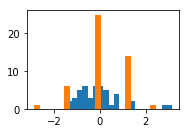

In [114]:
X_norm = (X - np.mean(X, axis=0))/np.std(X, axis=0)
plt.subplot(222)
plt.hist(X_norm[:,0], bins = 20)
plt.hist(X_norm[:,1], bins = 20)
plt.show()

In [98]:
#initializing the parameter vector
m = len(y)
x_norm = np.ones([m, X.shape[1] + 1])
x_norm[:,1:] = X_norm
y = y.reshape(m,1)

Using gradient descent with 500 iterations over the training set

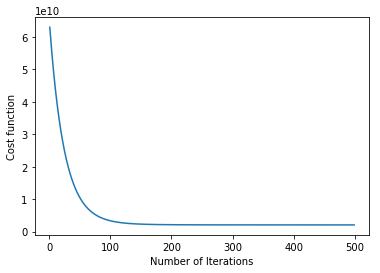

In [111]:
alpha = 0.02
Theta = np.zeros([X.shape[1] + 1, 1])
result = []
for i in range(1,500):
    Theta = gradDescentStep(x_norm, y, Theta, alpha)
    cost = computeCost(x_norm,y,Theta)
    result.append(cost)
costlist = np.array(result)    
plt.plot(np.arange(1,500),costlist)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost function')
#plt.axis([0,50, 0, 2])
#plt.title('Convergence of the gradient descent algorithm for learning rate = 0.02')
plt.show()

In [112]:
Theta

array([[ 340398.40948887],
       [ 108743.31080274],
       [  -5873.88309524]])

The learnt parameters for this regression are 